In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from sklearn.metrics import mean_squared_error
from scipy.stats import moment
from collections import Counter
import scipy as scipy
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [53]:
X = [22, 34, 24, 35, 36, 39, 42, 45, 48, 51, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80]
Y = [23, 45, 41, 54, 63, 72, 81, 120, 99, 79, 117, 130, 128, 165, 153, 170, 165, 150, 170, 198]
df = pd.DataFrame({
    'X': X,
    'Y': Y,
})
df['X^2'] = df['X']**2
df['XY'] = df['X'] * df['Y']
x_median, y_median, x_mean, y_mean = sts.median(X), sts.median(Y), sts.mean(X), sts.mean(Y)
n = len(df['X'])
print(x_median, x_mean)
print(y_median, y_mean)
df.head()

52.0 52.05
118.5 111.15


,X,Y,X^2,XY
0,22,23,484,506
1,34,45,1156,1530
2,24,41,576,984
3,35,54,1225,1890
4,36,63,1296,2268


In [54]:
r = df['Y'].corr(df['X'])
sd_x = sts.stdev(df['X'])
sd_y = sts.stdev(df['Y'])

a = r * (sd_y/sd_x)
b = y_mean - a * x_mean

print('r = ', r)
print('sd_x = ', sd_x)
print('sd_y = ', sd_y)
print('a = ', a)
print('b = ', b)

r =  0.9618327009976746
sd_x =  17.370498280887507
sd_y =  51.58363163476937
a =  2.8562694598766774
b =  -37.51882538658106


In [55]:
df['y_pred'] = a * df['X'] + b
df.head()

,X,Y,X^2,XY,y_pred
0,22,23,484,506,25.319103
1,34,45,1156,1530,59.594336
2,24,41,576,984,31.031642
3,35,54,1225,1890,62.450606
4,36,63,1296,2268,65.306875


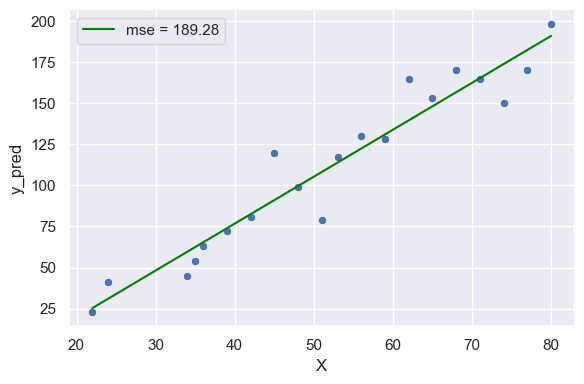

In [66]:
mse = mean_squared_error(df['Y'], df['y_pred'])
ax = sns.relplot(kind='scatter', x='X', y='Y', data=df, height=4, aspect=1.5)
ax.map_dataframe(sns.lineplot, 'X', 'y_pred', color='green', label='mse = '+str(round(mse, 2)))
plt.legend()
plt.show()

0.0


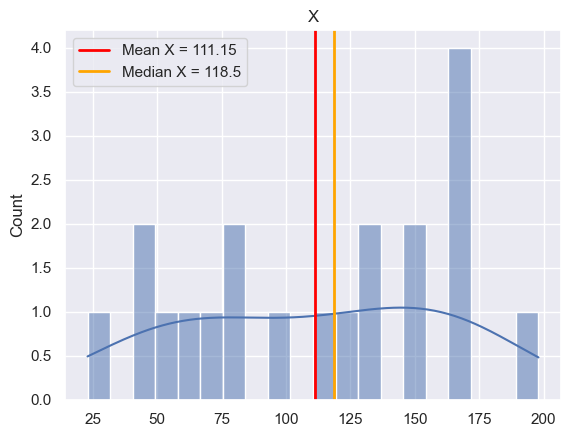

In [72]:
sns.histplot(Y, bins=20, kde=True).set_title('X')
plt.axvline(x=y_mean, color='red', label='Mean X = ' + str(round(y_mean,2)), linewidth=2)
plt.axvline(x=y_median, color='orange', label='Median X = ' + str(round(y_median,2)), linewidth=2)
plt.legend()
plt.show()